<a href="https://colab.research.google.com/github/RyRyRyRy321/CCRNFLRL_EXAM_ML201/blob/main/Machine_Problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [381]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Problem 1

1. Create your own environment by constructing the maze in the image below.
2. Find the optimal policy to exit depicted by a star in the maze.

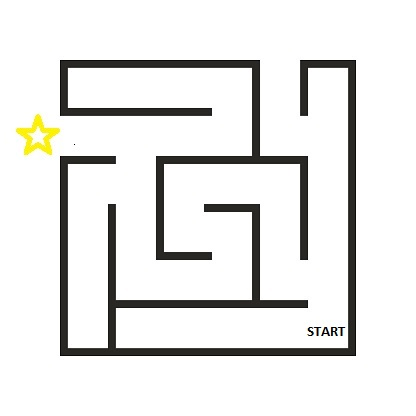

In [382]:
class gridworld:
    
    def __init__(self):
        self.dim = [17, 18]
        self.pos_A = [13, 14]
        self.rew_A = 15

        # Define starting position
        self.start = [5, 1]
        self.s = self.start[:]
        self.reward = 0

        # Define the position of the walls here
        self.walls = [
            [2,2],
            [2,3],
            [2,4],
            [2,5],
            [2,6],
            [2,7],
            [2,8],
            [2,9],
            [2,10],
            [2,11],
            [2,13],
            [2,14],
            [2,15],
            [3,2],
            [3,9],
            [3,10],
            [3,11],
            [3,13],
            [3,15],
            [4,2],
            [4,3],
            [4,4],
            [4,5],
            [4,6],
            [4,7],
            [4,9],
            [4,10],
            [4,11],
            [4,13],
            [4,15],
            [5,9],
            [5,10],
            [5,11],
            [5,15],
            [6,2],
            [6,3],
            [6,4],
            [6,5],
            [6,7],
            [6,8],
            [6,9],
            [6,10],
            [6,11],
            [6,12],
            [6,13],
            [6,15],
            [7,3],
            [7,7],
            [7,13],
            [7,15],
            [8,3],
            [8,5],
            [8,7],
            [8,9],
            [8,10],
            [8,11],
            [8,13],
            [8,15],
            [9,3],
            [9,5],
            [9,7],
            [9,11],
            [9,13],
            [9,15],
            [10,3],
            [10,5],
            [10,7],
            [10,8],
            [10,9],
            [10,11],
            [10,13],
            [10,15],
            [11,3],
            [11,5],
            [11,11],
            [11,15],
            [12,3],
            [12,5],
            [12,6],
            [12,7],
            [12,8],
            [12,9],
            [12,10],
            [12,11],
            [12,12],
            [12,13],
            [12,15],
            [13,3],
            [13,5],
            [13,15],
            [14,3],
            [14,4],
            [14,5],
            [14,6],
            [14,7],
            [14,8],
            [14,9],
            [14,10],
            [14,11],
            [14,13],
            [14,14],
            [14,15],
        ]
        

        # Step count
        self.n = 0
        self.action_space = ["U", "L", "D", "R"]
        self.action_prob = [0.25, 0.25, 0.25, 0.25]
    
    # Show empty environment
    def show_grid(self):
        # print rows
        for i in range(self.dim[0]):
            print("-" * (self.dim[0] * 5 + 1))
            row = []
            
            for j in range(self.dim[1]):
                if i == self.pos_A[0] and j == self.pos_A[1]:
                    row.append("| A ")
                elif i == self.start[0] and j == self.start[1]:
                    row.append("| S ")
                elif [i,j] in self.walls:
                    row.append("| W ")  
                else:
                    row.append("|   ")
                    
            row.append("|  ")
            print(' '.join(row))
        print("-" * (self.dim[0] * 5 + 1))
        
    # Show state
    def show_state(self):
        # print rows
        for i in range(self.dim[0]):
            print("-" * (self.dim[0] * 5 + 1))
            row = []
            for j in range(self.dim[1]):
                if i == self.s[0] and j == self.s[1]:
                    row.append("| X ")
                elif i == self.pos_A[0] and j == self.pos_A[1]:
                    row.append("| A ")
                elif [i,j] in self.walls:
                    row.append("| W ") 
                else:
                    row.append("|   ")
            row.append("|  ")
            print(' '.join(row))
        print("-" * (self.dim[0] * 5 + 1))
        
    # Give the agent an action
    def action(self, a):  
        if a not in self.action_space:  
            return "Error: Invalid action submission"
        # Check for special transition states
        if self.s == self.pos_A:
            self.reward = self.rew_A
        elif self.s in self.walls:
            self.reward = -1      
        # Move up
        elif a == "U" and self.s[0] > 0:
              self.s[0] -= 1
              self.reward = 0      
        # Move left
        elif a == "L" and self.s[1] > 0:
            self.s[1] -= 1
            self.reward = 0
        # Move down
        elif a == "D" and self.s[0] < self.dim[0] - 1:
            self.s[0] += 1
            self.reward = 0
        # Move right
        elif a == "R" and self.s[1] < self.dim[1] - 1:
            self.s[1] += 1
            self.reward = 0
        else:
            self.reward = -1
        self.n += 1
        return self.s, self.reward
            
    def reset(self):
        self.s = self.start
        self.reward = 0
        self.n = 0

We can view the environment with the show_grid() method or use the show_state() method to see where the agent is.

In [383]:
grid = gridworld()
grid.show_grid()

--------------------------------------------------------------------------------------
|    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |  
--------------------------------------------------------------------------------------
|    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |  
--------------------------------------------------------------------------------------
|    |    | W  | W  | W  | W  | W  | W  | W  | W  | W  | W  |    | W  | W  | W  |    |    |  
--------------------------------------------------------------------------------------
|    |    | W  |    |    |    |    |    |    | W  | W  | W  |    | W  |    | W  |    |    |  
--------------------------------------------------------------------------------------
|    |    | W  | W  | W  | W  | W  | W  |    | W  | W  | W  |    | W  |    | W  |    |    |  
--------------------------------------------------------------------------------------
|    | S

In [384]:
grid.show_state()

--------------------------------------------------------------------------------------
|    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |  
--------------------------------------------------------------------------------------
|    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |  
--------------------------------------------------------------------------------------
|    |    | W  | W  | W  | W  | W  | W  | W  | W  | W  | W  |    | W  | W  | W  |    |    |  
--------------------------------------------------------------------------------------
|    |    | W  |    |    |    |    |    |    | W  | W  | W  |    | W  |    | W  |    |    |  
--------------------------------------------------------------------------------------
|    |    | W  | W  | W  | W  | W  | W  |    | W  | W  | W  |    | W  |    | W  |    |    |  
--------------------------------------------------------------------------------------
|    | X

# Value Function

In [385]:
v = np.zeros(grid.dim)
gamma = 0.4
delta = 1e-7
delta_t = 1

while delta_t > delta:
    v_new = np.zeros(grid.dim)
    for i in range(grid.dim[0]):
        for j in range(grid.dim[1]):
            for action in grid.action_space:
                grid.s = [i, j]
                s, r = grid.action(action)
                prob = grid.action_prob[grid.action_space.index(action)]
                v_new[i, j] += prob * (r + gamma * v[s[0], s[1]])
    delta_t = np.sum(np.abs(v - v_new))
    v = v_new.copy()
    
print(v.round(1))

[[-0.7 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4 -0.4
  -0.4 -0.4 -0.4 -0.7]
 [-0.4 -0.1 -0.2 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.3 -0.2 -0.1 -0.2
  -0.3 -0.2 -0.1 -0.4]
 [-0.4 -0.2 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -0.4 -1.7
  -1.7 -1.7 -0.2 -0.4]
 [-0.4 -0.3 -1.7 -0.5 -0.4 -0.4 -0.4 -0.4 -0.4 -1.7 -1.7 -1.7 -0.4 -1.7
  -0.5 -1.7 -0.3 -0.4]
 [-0.4 -0.2 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -0.4 -1.7 -1.7 -1.7 -0.4 -1.7
  -0.4 -1.7 -0.3 -0.4]
 [-0.4 -0.1 -0.4 -0.4 -0.4 -0.4 -0.3 -0.4 -0.4 -1.7 -1.7 -1.7 -0.4 -0.4
  -0.3 -1.7 -0.3 -0.4]
 [-0.4 -0.2 -1.7 -1.7 -1.7 -1.7 -0.4 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7
  -0.4 -1.7 -0.3 -0.4]
 [-0.4 -0.1 -0.4 -1.7 -0.4 -0.4 -0.3 -1.7 -0.4 -0.4 -0.4 -0.4 -0.4 -1.7
  -0.4 -1.7 -0.3 -0.4]
 [-0.4 -0.1 -0.2 -1.7 -0.4 -1.7 -0.4 -1.7 -0.4 -1.7 -1.7 -1.7 -0.4 -1.7
  -0.4 -1.7 -0.3 -0.4]
 [-0.4 -0.1 -0.2 -1.7 -0.4 -1.7 -0.4 -1.7 -0.4 -0.4 -0.4 -1.7 -0.4 -1.7
  -0.4 -1.7 -0.3 -0.4]
 [-0.4 -0.1 -0.2 -1.7 -0.4 -1.7 -0.4 -1.7 -1.7 -1.

In [386]:
q = np.zeros((grid.dim[0], grid.dim[1], len(grid.action_space)))
delta_t = 1

while delta_t > delta:
    q_old = q.copy()
    for i in range(grid.dim[0]):
        for j in range(grid.dim[1]):
            for a in grid.action_space:
                grid.s = [i, j]
                s, r = grid.action(a)
                a_index = grid.action_space.index(a)
                q[i, j, a_index] = r + gamma * np.max(q_old[s[0], s[1]])
    delta_t = np.sum(np.abs(q - q_old))
    
print(np.max(q, axis=2).round(1))

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. ]
 [ 0.   0.  -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7  0.  -1.7
  -1.7 -1.7  0.   0. ]
 [ 0.   0.  -1.7  0.   0.   0.   0.   0.   0.  -1.7 -1.7 -1.7  0.  -1.7
   0.  -1.7  0.   0. ]
 [ 0.   0.  -1.7 -1.7 -1.7 -1.7 -1.7 -1.7  0.  -1.7 -1.7 -1.7  0.  -1.7
   0.  -1.7  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.7 -1.7 -1.7  0.   0.
   0.  -1.7  0.   0. ]
 [ 0.   0.  -1.7 -1.7 -1.7 -1.7  0.  -1.7 -1.7 -1.7 -1.7 -1.7 -1.7 -1.7
   0.  -1.7  0.   0. ]
 [ 0.   0.   0.  -1.7  0.   0.   0.  -1.7  0.   0.   0.   0.   0.  -1.7
   0.1 -1.7  0.   0. ]
 [ 0.   0.   0.  -1.7  0.  -1.7  0.  -1.7  0.  -1.7 -1.7 -1.7  0.  -1.7
   0.3 -1.7  0.   0. ]
 [ 0.   0.   0.  -1.7  0.  -1.7  0.  -1.7  0.   0.   0.  -1.7  0.1 -1.7
   0.6 -1.7  0.   0. ]
 [ 0.   0.   0.  -1.7  0.  -1.7  0.  -1.7 -1.7 -1.7  

# Optimal Policy

In [387]:
def opt_policy(q, grid):
    q_max = np.max(q, axis=2)
    x = np.linspace(0, grid.dim[0] - 1, grid.dim[0]) + 0.5
    y = np.linspace(grid.dim[1] - 1, 0, grid.dim[1]) + 0.5
    X, Y = np.meshgrid(x, y)
    zeros = np.zeros((grid.dim))
    
    fig = plt.figure(figsize=(18,18))
    ax = plt.axes()
    
    for i, action in enumerate(grid.action_space):
        q_star = np.zeros((17, 18))
        for j in range(grid.dim[0]):
            for k in reversed(range(grid.dim[1])):
                if q[j, k, i] == q_max[j, k]:
                    q_star[j, k] = 0.4
        # Plot results
        if action == "U":
            # Vectors point in positive Y-direction
            plt.quiver(X, Y, zeros, q_star, scale=1, units='xy')
        elif action == "L":
            # Vectors point in negative X-direction
            plt.quiver(X, Y, -q_star, zeros, scale=1, units='xy')
        elif action == "D":
            # Vectors point in negative Y-direction
            plt.quiver(X, Y, zeros, -q_star, scale=1, units='xy')
        elif action == "R":
            # Vectors point in positive X-direction
            plt.quiver(X, Y, q_star, zeros, scale=1, units='xy')
        
    plt.xlim([0, grid.dim[0]])
    plt.ylim([0, grid.dim[1]])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid()
    plt.show()

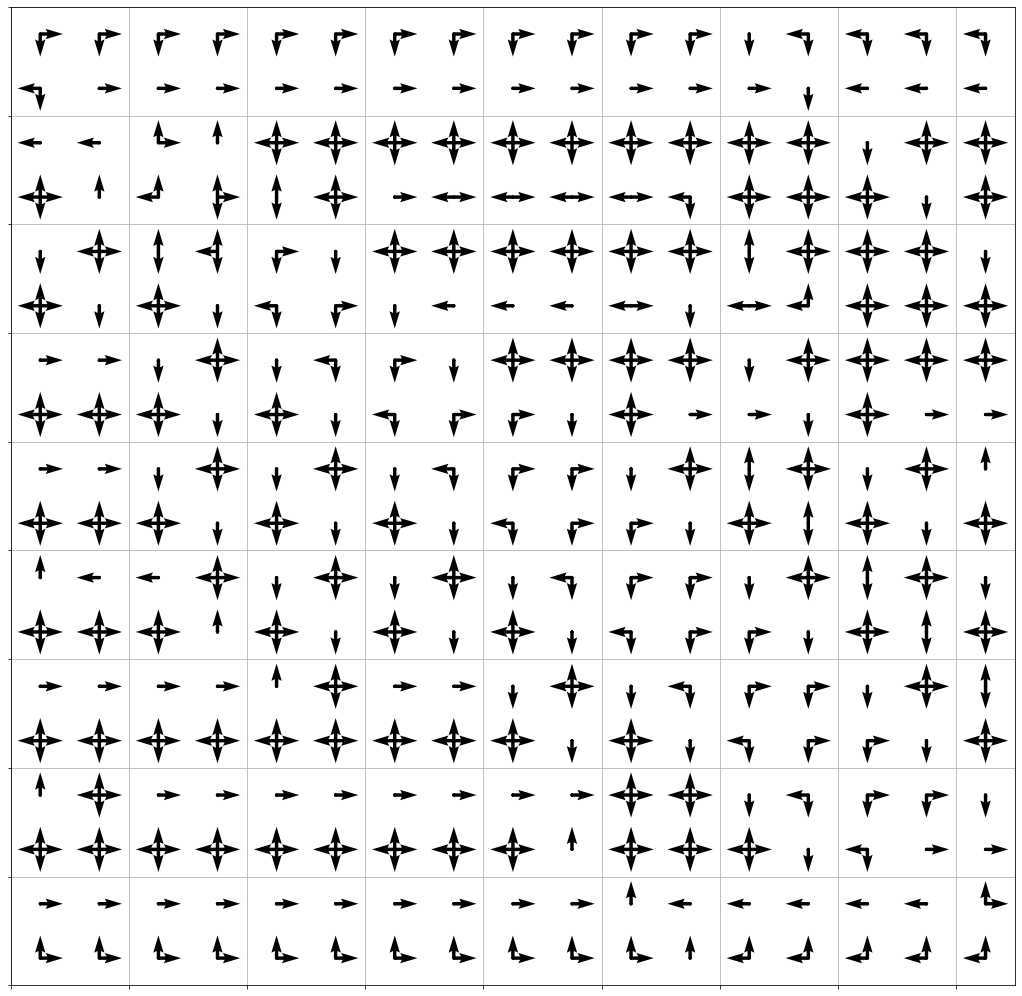

In [388]:
opt_policy(q, grid)